In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv


In [ ]:
plt.rcParams['font.size'] = 18  # Default font size
plt.rcParams['axes.labelsize'] = 18  # Font size of axis labels
plt.rcParams['axes.titlesize'] = 18  # Font size of plot titles
plt.rcParams['xtick.labelsize'] = 14  # Font size of x-axis tick labels
plt.rcParams['ytick.labelsize'] = 14  # Font size of y-axis tick labels
plt.rcParams['legend.fontsize'] = 12  # Font size of legend

### **Evaluation**

In [ ]:
# Read the CSV files
drl_file_path = 'drl_violations.csv'
safety_drl_file_path = 'safety_drl_violations.csv'

# Read CSV files and take the minimum of both lengths
df_drl = pd.read_csv(drl_file_path)
df_safety_drl = pd.read_csv(safety_drl_file_path)

min_length = min(len(df_drl), len(df_safety_drl))

# Truncate dataframes to the minimum length
df_drl = df_drl.iloc[:min_length]
df_safety_drl = df_safety_drl.iloc[:min_length]

# Columns to plot
columns_to_plot = ['collision', 'speed violation', 'object collision', 'velocity violation', 'success']

# Calculate running mean with a window size of 10 episodes for each selected column
window_size = 50
for col in columns_to_plot:
    df_drl[f'{col}_running_mean'] = df_drl[col].rolling(window=window_size).mean()
    df_safety_drl[f'{col}_running_mean'] = df_safety_drl[col].rolling(window=window_size).mean()

# Set up subplots within a larger figure
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(12, 3 * len(columns_to_plot)))

# Plotting for each column on separate subplots
for i, col in enumerate(columns_to_plot):
    axes[i].plot(df_drl['steps'], df_drl[f'{col}_running_mean'], label=f'DRL - {col} Running Mean (Window={window_size})')
    axes[i].plot(df_safety_drl['steps'], df_safety_drl[f'{col}_running_mean'], label=f'Safety DRL - {col} Running Mean (Window={window_size})')

    axes[i].set_xlabel('Training Steps')
    axes[i].set_ylabel('Running Mean')
    axes[i].legend()
    axes[i].set_title(f'Running Mean of {col} over Episodes')

# Adjust layout
plt.tight_layout()
plt.show()

NameError: name 'pd' is not defined

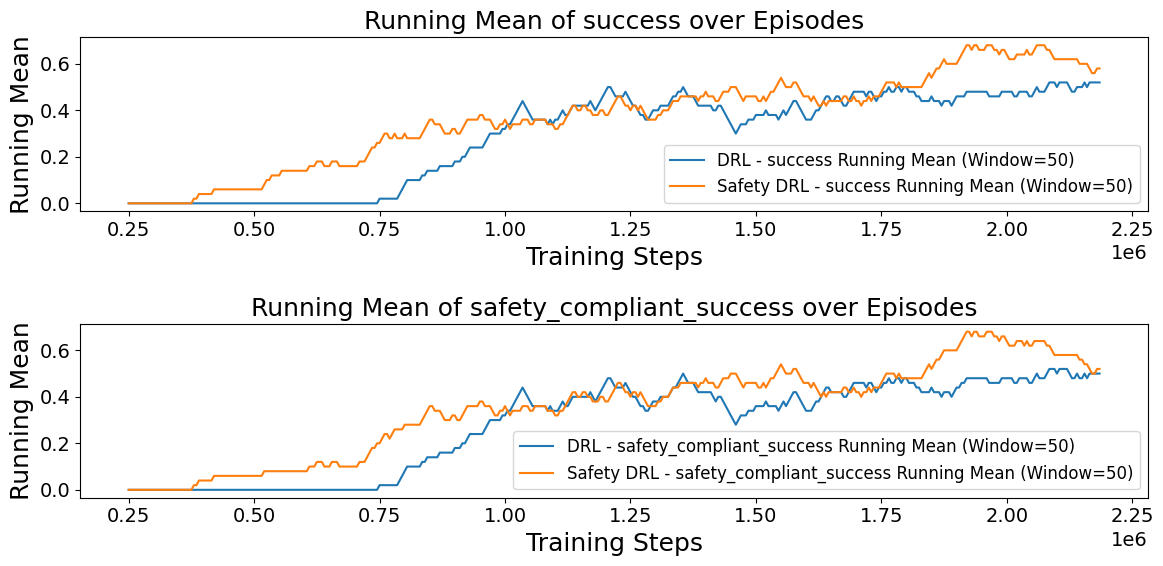

In [ ]:
# Create a new column where success column equals 0 if any of the other columns equal 1
df_drl['safety_compliant_success'] = df_drl.apply(lambda row: 0 if any(row[col] == 1 for col in columns_to_plot[:-1]) else row['success'], axis=1)
df_safety_drl['safety_compliant_success'] = df_safety_drl.apply(lambda row: 0 if any(row[col] == 1 for col in columns_to_plot[:-1]) else row['success'], axis=1)


# Calculate running mean with a window size of 50 episodes for each selected column
window_size = 50
for col in ['success', 'safety_compliant_success']:
    df_drl[f'{col}_running_mean'] = df_drl[col].rolling(window=window_size).mean()
    df_safety_drl[f'{col}_running_mean'] = df_safety_drl[col].rolling(window=window_size).mean()

# Set up subplots within a larger figure
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))

# Plotting for each column on separate subplots
for i, col in enumerate(['success', 'safety_compliant_success']):
    axes[i].plot(df_drl['steps'], df_drl[f'{col}_running_mean'], label=f'DRL - {col} Running Mean (Window={window_size})')
    axes[i].plot(df_safety_drl['steps'], df_safety_drl[f'{col}_running_mean'], label=f'Safety DRL - {col} Running Mean (Window={window_size})')

    axes[i].set_xlabel('Training Steps')
    axes[i].set_ylabel('Running Mean')
    axes[i].legend()
    axes[i].set_title(f'Running Mean of {col} over Episodes')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the average for each column in each dataframe
columns_to_plot = columns_to_plot + ['velocity during collision']
column_averages_drl = df_drl[columns_to_plot].mean()
column_averages_safety_drl = df_safety_drl[columns_to_plot].mean()

# Concatenate the average values into a single dataframe
average_df = pd.concat([column_averages_drl, column_averages_safety_drl], axis=1)
average_df.columns = ['DRL Average', 'Safety DRL Average']

# Display the average values in a table
print("Average values for each column:")
print(np.round(average_df,3))

Average values for each column:
                           DRL Average  Safety DRL Average
collision                        0.048               0.043
speed violation                  0.018               0.018
object collision                 0.002               0.014
velocity violation               0.037               0.043
success                          0.286               0.359
velocity during collision        0.439               0.231


In [ ]:
# Calculate the rate of success and new_success
success_rate = df_drl['success'].sum() / len(df_drl)
safety_compliant_success_rate = df_drl['safety_compliant_success'].sum() / len(df_drl)

print(f"DRL Success Rate: {np.round(success_rate, 2)}")
print(f"DRL Safety-Compliant Success Rate: {np.round(safety_compliant_success_rate, 2)}")

# Calculate the successful attempts for both success rate and safety-compliant success rate
successful_attempts = df_drl['success'].sum()
safety_compliant_successful_attempts = df_drl['safety_compliant_success'].sum()

# Add successful attempts to the printed output
print(f"DRL Successful Attempts: {successful_attempts}")
print(f"DRL Safety-Compliant Successful Attempts: {safety_compliant_successful_attempts}")

success_rate_safety = df_safety_drl['success'].sum() / len(df_safety_drl)
safety_compliant_success_rate_safety = df_safety_drl['safety_compliant_success'].sum() / len(df_safety_drl)

print(f"Safety DRL Success Rate: {np.round(success_rate_safety, 2)}")
print(f"Safety DRL Safety-Compliant Success Rate: {np.round(safety_compliant_success_rate_safety, 2)}")

# Calculate the successful attempts for both success rate and safety-compliant success rate for safety DRL
successful_attempts_safety = df_safety_drl['success'].sum()
safety_compliant_successful_attempts_safety = df_safety_drl['safety_compliant_success'].sum()

# Add successful attempts to the printed output for safety DRL
print(f"Safety DRL Successful Attempts: {successful_attempts_safety}")
print(f"Safety DRL Safety-Compliant Successful Attempts: {safety_compliant_successful_attempts_safety}")


DRL Success Rate: 0.29
DRL Safety-Compliant Success Rate: 0.28
DRL Successful Attempts: 125
DRL Safety-Compliant Successful Attempts: 121.0
Safety DRL Success Rate: 0.36
Safety DRL Safety-Compliant Success Rate: 0.34
Safety DRL Successful Attempts: 157
Safety DRL Safety-Compliant Successful Attempts: 150.0


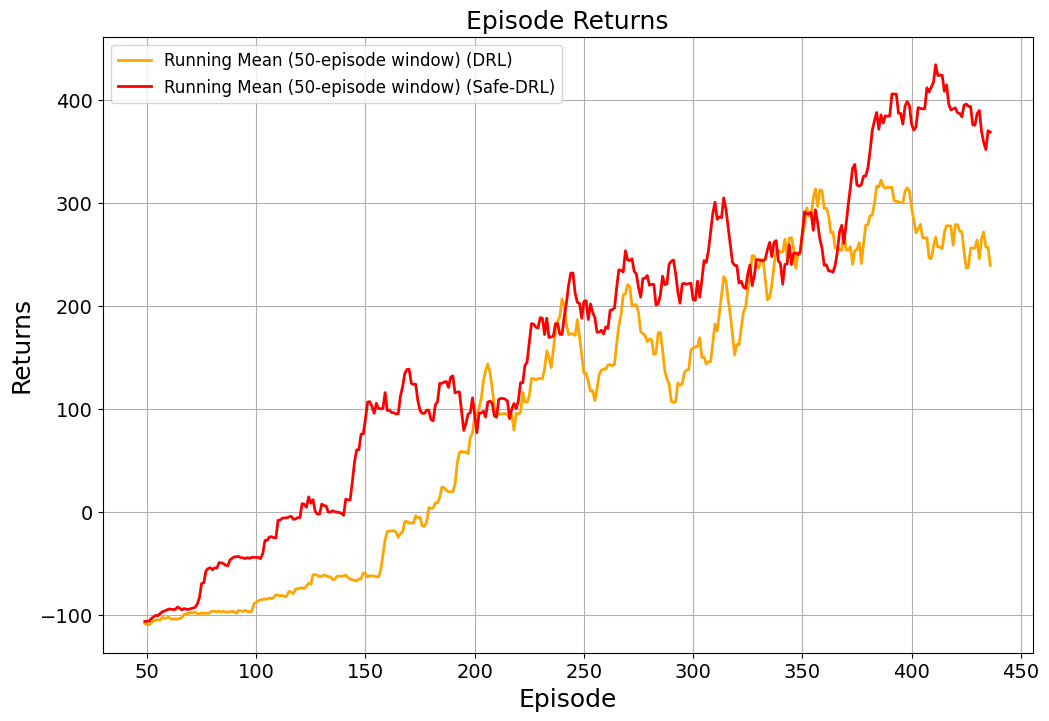

In [ ]:
# Assuming you have df_safety_drl DataFrame
returns_drl = df_drl['return']
returns_safety_drl = df_safety_drl['return']

# Define the window size for the moving average
window_size = 50

# Calculate the running mean for both DataFrames
running_mean_drl = np.convolve(returns_drl, np.ones(window_size)/window_size, mode='valid')
running_mean_safety_drl = np.convolve(returns_safety_drl, np.ones(window_size)/window_size, mode='valid')

# Plotting Episode Returns and Running Mean for both DataFrames
plt.figure(figsize=(12, 8))
# plt.plot(returns_drl, label='Episode Returns (df_drl)', color='blue', alpha=0.5)
# plt.plot(returns_safety_drl, label='Episode Returns (df_safety_drl)', color='green', alpha=0.5)

plt.plot(np.arange(window_size-1, len(returns_drl)), running_mean_drl, label=f'Running Mean ({window_size}-episode window) (DRL)', color='orange', linewidth=2)
plt.plot(np.arange(window_size-1, len(returns_safety_drl)), running_mean_safety_drl, label=f'Running Mean ({window_size}-episode window) (Safe-DRL)', color='red', linewidth=2)

plt.title('Episode Returns')
plt.xlabel('Episode')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()


### ***Velocity Profile***

In [ ]:
safety_drl_test_file_path = 'velocity_test_drl.csv'
df = pd.read_csv(safety_drl_test_file_path)

filtered_df = df[(df['collision'] > 0) | (df['object collision'] > 0)]
df_drl_safety = filtered_df
df_drl_safety_velocity = filtered_df['velocity']
df_drl_safety_velocity_during_collision = filtered_df['velocity during collision']
df_drl_safety_velocity.shape

data = pd.DataFrame([[float(value) for value in df_drl_safety_velocity[i].strip('[]').split(',')][1:] for i in df_drl_safety_velocity.index])

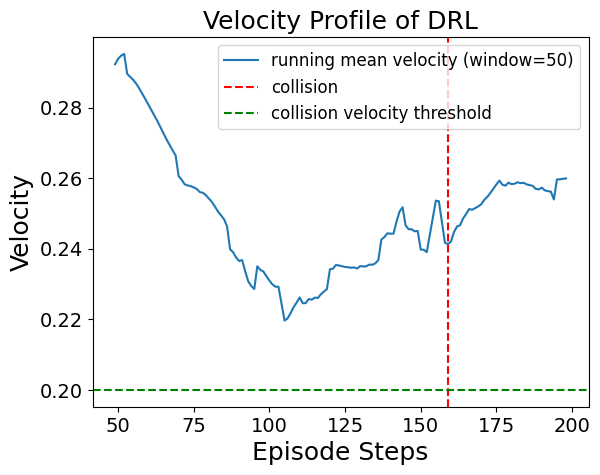

In [ ]:
i = 2

plt.plot(data.iloc[i].rolling(window=50).mean(), label='running mean velocity (window=50)')
index = df_drl_safety.iloc[i]['collision timestep']

plt.axvline(x=index, color='r', linestyle='--', label='collision')
plt.axhline(y=0.2, color='g', linestyle='--', label='collision velocity threshold')

plt.xlabel('Episode Steps')
plt.ylabel('Velocity')
plt.title('Velocity Profile of DRL')

plt.legend()

In [ ]:
safety_drl_test_file_path = 'velocity_test_safe_drl.csv'
df = pd.read_csv(safety_drl_test_file_path)

filtered_df = df[(df['collision'] > 0) | (df['object collision'] > 0)]
df_drl_safety = filtered_df
df_drl_safety_velocity = filtered_df['velocity']
df_drl_safety_velocity_during_collision = filtered_df['velocity during collision']
df_drl_safety_velocity.shape

data = pd.DataFrame([[float(value) for value in df_drl_safety_velocity[i].strip('[]').split(',')][1:] for i in df_drl_safety_velocity.index])

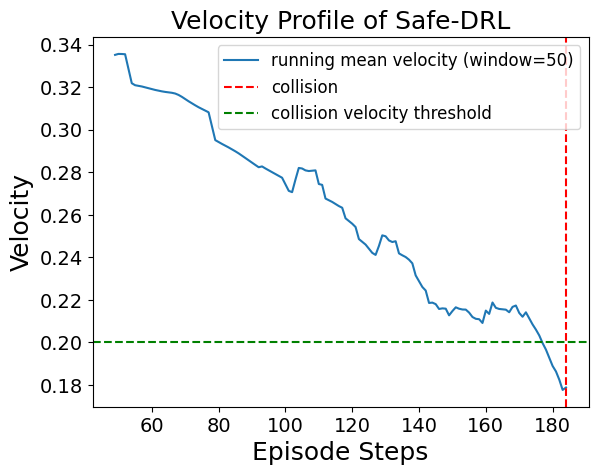

In [ ]:
i = 3

plt.plot(data.iloc[i].rolling(window=50).mean(), label='running mean velocity (window=50)')
index = df_drl_safety.iloc[i]['collision timestep']

plt.axvline(x=index, color='r', linestyle='--', label='collision')
plt.axhline(y=0.2, color='g', linestyle='--', label='collision velocity threshold')

plt.xlabel('Episode Steps')
plt.ylabel('Velocity')
plt.title('Velocity Profile of Safe-DRL')

plt.legend()

### **Anomaly Static**




In [ ]:
# Read the CSV files
drl_file_path = 'drl_violations.csv'
safety_drl_file_path = 'safety_drl_violations.csv'

# Read CSV files and take the minimum of both lengths
df_drl = pd.read_csv(drl_file_path)
df_safety_drl = pd.read_csv(safety_drl_file_path)

min_length = min(len(df_drl), len(df_safety_drl))

# Truncate dataframes to the minimum length
df_drl = df_drl.iloc[:min_length]
df_safety_drl = df_safety_drl.iloc[:min_length]

# Columns to plot
columns_to_plot = ['collision', 'speed violation', 'object collision', 'velocity violation', 'success']

# Calculate running mean with a window size of 10 episodes for each selected column
window_size = 50
for col in columns_to_plot:
    df_drl[f'{col}_running_mean'] = df_drl[col].rolling(window=window_size).mean()
    df_safety_drl[f'{col}_running_mean'] = df_safety_drl[col].rolling(window=window_size).mean()

# Set up subplots within a larger figure
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(12, 3 * len(columns_to_plot)))

# Plotting for each column on separate subplots
for i, col in enumerate(columns_to_plot):
    axes[i].plot(df_drl['steps'], df_drl[f'{col}_running_mean'], label=f'DRL - {col} Running Mean (Window={window_size})')
    axes[i].plot(df_safety_drl['steps'], df_safety_drl[f'{col}_running_mean'], label=f'Safety DRL - {col} Running Mean (Window={window_size})')

    axes[i].set_xlabel('Training Steps')
    axes[i].set_ylabel('Running Mean')
    axes[i].legend()
    axes[i].set_title(f'Running Mean of {col} over Episodes')

# Adjust layout
plt.tight_layout()
plt.show()

# Calculate the average for each column in each dataframe
columns_to_plot = columns_to_plot + ['velocity during collision']
column_averages_drl = df_drl[columns_to_plot].mean()
column_averages_safety_drl = df_safety_drl[columns_to_plot].mean()

# Concatenate the average values into a single dataframe
average_df = pd.concat([column_averages_drl, column_averages_safety_drl], axis=1)
average_df.columns = ['DRL Average', 'Safety DRL Average']

# Display the average values in a table
print("Average values for each column:")
print(np.round(average_df,3))

# Calculate the rate of success and new_success
success_rate = df_drl['success'].sum() / len(df_drl)
safety_compliant_success_rate = df_drl['safety_compliant_success'].sum() / len(df_drl)

print(f"DRL Success Rate: {np.round(success_rate, 2)}")
print(f"DRL Safety-Compliant Success Rate: {np.round(safety_compliant_success_rate, 2)}")

# Calculate the successful attempts for both success rate and safety-compliant success rate
successful_attempts = df_drl['success'].sum()
safety_compliant_successful_attempts = df_drl['safety_compliant_success'].sum()

# Add successful attempts to the printed output
print(f"DRL Successful Attempts: {successful_attempts}")
print(f"DRL Safety-Compliant Successful Attempts: {safety_compliant_successful_attempts}")

success_rate_safety = df_safety_drl['success'].sum() / len(df_safety_drl)
safety_compliant_success_rate_safety = df_safety_drl['safety_compliant_success'].sum() / len(df_safety_drl)

print(f"Safety DRL Success Rate: {np.round(success_rate_safety, 2)}")
print(f"Safety DRL Safety-Compliant Success Rate: {np.round(safety_compliant_success_rate_safety, 2)}")

# Calculate the successful attempts for both success rate and safety-compliant success rate for safety DRL
successful_attempts_safety = df_safety_drl['success'].sum()
safety_compliant_successful_attempts_safety = df_safety_drl['safety_compliant_success'].sum()

# Add successful attempts to the printed output for safety DRL
print(f"Safety DRL Successful Attempts: {successful_attempts_safety}")
print(f"Safety DRL Safety-Compliant Successful Attempts: {safety_compliant_successful_attempts_safety}")


## **_misc**

In [ ]:
# returns = (np.load('_UR5PickAndPlaceEnv-v0_0.npy'))

# # Define the window size for the moving average
# window_size = 10

# # Calculate the running mean
# running_mean = np.convolve(returns, np.ones(window_size)/window_size, mode='valid')

# # Plotting Episode Returns and Running Mean
# plt.figure(figsize=(12, 8))
# plt.plot(returns, label='Episode Returns', color='blue', alpha=0.5)
# plt.plot(np.arange(window_size-1, len(returns)), running_mean, label=f'Running Mean ({window_size}-episode window)', color='orange', linewidth=2)

# plt.title('Episode Returns and Running Mean Over Time')
# plt.xlabel('Episode')
# plt.ylabel('Returns')
# plt.legend()
# plt.grid(True)
# plt.show()

In [ ]:
# # Read the CSV file
# csv_file_path = '20240312T174453_violations.csv'
# df_train = pd.read_csv(csv_file_path)

# # Columns to plot
# columns_to_plot = ['collision',
#                    'speed',
#                    'object collision',
#                    'velocity violation',
#                    ]

# # Calculate running mean with a window size of 10 episodes for each selected column
# window_size = 50
# for col in columns_to_plot:
#     df_train[f'{col}_running_mean'] = df_train[col].rolling(window=window_size).mean()

# # Plotting
# plt.figure(figsize=(10, 6))
# for col in columns_to_plot:
#     plt.plot(df_train['steps'], df_train[f'{col}_running_mean'], label=f'{col} Running Mean (Window={window_size})')

# plt.xlabel('Training Steps')
# plt.ylabel('Running Mean')
# plt.legend()
# plt.title('Running Mean of Columns over Episodes')
plt.show()

In [ ]:
# # Calculate the average for each column
# column_averages = df_train[columns_to_plot].mean()

# # Display the average values
# print("Average values for each column:")
# print(column_averages)

In [ ]:
# # Read the CSV file
# csv_file_path = 'violations_test.csv'
# df_test = pd.read_csv(csv_file_path, index_col=0)

# # Columns to plot
# columns_to_plot = ['collision',
#                    'speed',
#                   #  'ik',
#                    'object collision',
#                    'velocity',
#                    ]

# # Calculate running mean with a window size of 10 episodes for each selected column
# window_size = 50
# for col in columns_to_plot:
#     df_test[f'{col}_running_mean'] = df_test[col].rolling(window=window_size).mean()

# # Plotting
# plt.figure(figsize=(10, 6))
# for col in columns_to_plot:
#     plt.plot(df_test.index, df_test[f'{col}_running_mean'], label=f'{col} Running Mean (Window={window_size})')

# plt.xlabel('Episode')
# plt.ylabel('Running Mean')
# plt.legend()
# plt.title('Running Mean of Columns over Episodes')
# plt.show()

In [ ]:
# # Calculate the average for each column
# column_averages = df_test[columns_to_plot].mean()

# # Display the average values
# print("Average values for each column:")
# print(column_averages)